In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# Loading Weather Dataset

In [2]:
SmokingData = pd.read_csv(r"C:\Users\Dlc\Documents\dhanush\smoking.csv", header=0)

# Copy to back-uo file

SmokingData_BK =SmokingData.copy()

SmokingData.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


# Checking Dataset Information

In [3]:
SmokingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

# Counting Unique Values for Catagorical Variables inorder to label Encoding Process

In [4]:
SmokingData['gender'].value_counts()

M    35401
F    20291
Name: gender, dtype: int64

In [5]:
SmokingData['oral'].value_counts()

Y    55692
Name: oral, dtype: int64

In [6]:
SmokingData['tartar'].value_counts()

Y    30940
N    24752
Name: tartar, dtype: int64

# LabelEncoding

In [7]:
SmokingData['gender']=SmokingData['gender'].map({'F':0,'M':1})
SmokingData['oral']=SmokingData['oral'].map({'Y':0})
SmokingData['tartar']=SmokingData['tartar'].map({'N':0,'Y':1})
SmokingData.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0


In [8]:
smoking_count = SmokingData.smoking.value_counts()
smoking_count

0    35237
1    20455
Name: smoking, dtype: int64

# Identifying The Proportion of Target Variable in Dataset

In [9]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

smoking_count = SmokingData.smoking.value_counts()
print('Class 0:', smoking_count[0])
print('Class 1:', smoking_count[1])
print('Proportion:', round(smoking_count[0] /smoking_count[1], 2), ': 1')
print('Total Bank records:', len(SmokingData))

Class 0: 35237
Class 1: 20455
Proportion: 1.72 : 1
Total Bank records: 55692


# checking Duplicate Values in the Dataset

In [10]:
SmokingData.duplicated().any()

False

# Checking Any Missing Values In the Dataset

In [11]:
SmokingData.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

# Identifying Unique Values For Each Variable in The Dataset

In [12]:
SmokingData.nunique()

ID                     55692
gender                     2
age                       14
height(cm)                13
weight(kg)                22
waist(cm)                566
eyesight(left)            19
eyesight(right)           17
hearing(left)              2
hearing(right)             2
systolic                 130
relaxation                95
fasting blood sugar      276
Cholesterol              286
triglyceride             390
HDL                      126
LDL                      289
hemoglobin               145
Urine protein              6
serum creatinine          38
AST                      219
ALT                      245
Gtp                      488
oral                       1
dental caries              2
tartar                     2
smoking                    2
dtype: int64

In [13]:
SmokingData_dup=SmokingData[SmokingData.duplicated(keep='last')]
SmokingData_dup.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking


In [14]:
SmokingData=SmokingData.drop(['ID'],axis=1)
SmokingData.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0


# Identify the independent and target (dependent) variables

In [15]:
#identify the independent and target variables

IndepVar = []
for col in SmokingData.columns:
    if col !='smoking':
        IndepVar.append(col)

TargetVar = 'smoking'

x=SmokingData[IndepVar]
y=SmokingData[TargetVar]
x.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


# Split the data into train and test (random sampling)

In [16]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38984, 25), (16708, 25), (38984,), (16708,))

# Scaling the features by using MinMaxScaler

In [17]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Compare Algorithms

In [18]:
KNN_Results= pd.read_csv(r"C:\Users\Dlc\Downloads\KNN_Results (2) (1).csv",header=0)

#copy the file
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[3985 2166]
 [2908 7649]]
Outcome values : 
 3985 2166 2908 7649
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.65      0.61      6151
           0       0.78      0.72      0.75     10557

    accuracy                           0.70     16708
   macro avg       0.68      0.69      0.68     16708
weighted avg       0.71      0.70      0.70     16708

Accuracy : 69.6 %
Precision : 57.8 %
Recall : 64.8 %
F1 Score : 0.611
Specificity or True Negative Rate : 72.5 %
Balanced Accuracy : 68.6 %
MCC : 0.365
roc_auc_score: 0.686


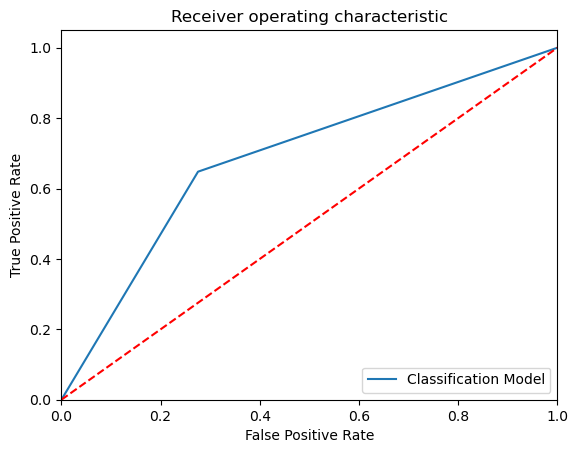

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[2978 3173]
 [1744 8813]]
Outcome values : 
 2978 3173 1744 8813
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.48      0.55      6151
           0       0.74      0.83      0.78     10557

    accuracy                           0.71     16708
   macro avg       0.68      0.66      0.66     16708
weighted avg       0.70      0.71      0.70     16708

Accuracy : 70.6 %
Precision : 63.1 %
Recall : 48.4 %
F1 Score : 0.548
Specificity or True Negative Rate : 83.5 %
Balanced Accuracy : 66.0 %
MCC : 0.342
roc_auc_score: 0.659


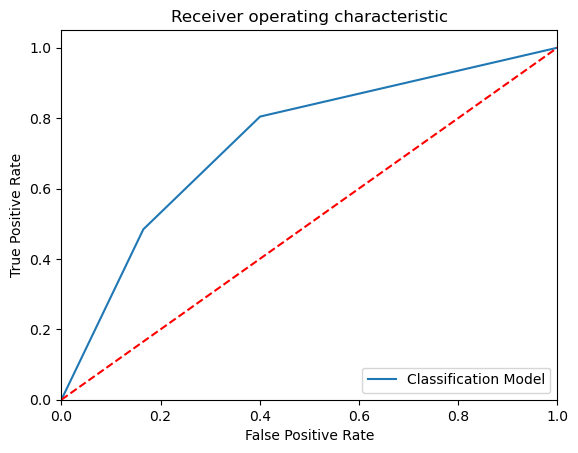

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[4173 1978]
 [2934 7623]]
Outcome values : 
 4173 1978 2934 7623
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.68      0.63      6151
           0       0.79      0.72      0.76     10557

    accuracy                           0.71     16708
   macro avg       0.69      0.70      0.69     16708
weighted avg       0.72      0.71      0.71     16708

Accuracy : 70.6 %
Precision : 58.7 %
Recall : 67.8 %
F1 Score : 0.63
Specificity or True Negative Rate : 72.2 %
Balanced Accuracy : 70.0 %
MCC : 0.391
roc_auc_score: 0.7


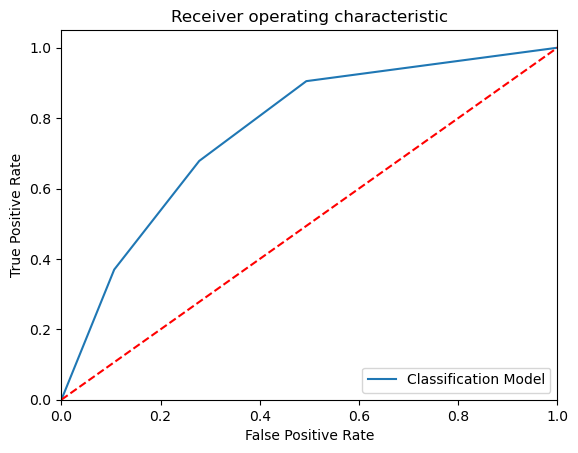

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[3497 2654]
 [2107 8450]]
Outcome values : 
 3497 2654 2107 8450
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.57      0.59      6151
           0       0.76      0.80      0.78     10557

    accuracy                           0.72     16708
   macro avg       0.69      0.68      0.69     16708
weighted avg       0.71      0.72      0.71     16708

Accuracy : 71.5 %
Precision : 62.4 %
Recall : 56.9 %
F1 Score : 0.595
Specificity or True Negative Rate : 80.0 %
Balanced Accuracy : 68.4 %
MCC : 0.377
roc_auc_score: 0.684


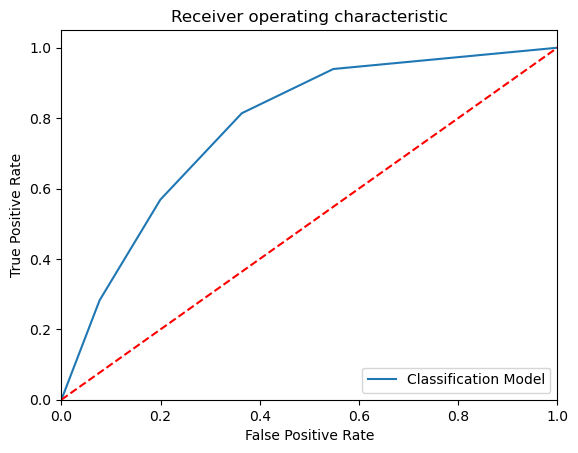

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[4451 1700]
 [2968 7589]]
Outcome values : 
 4451 1700 2968 7589
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.72      0.66      6151
           0       0.82      0.72      0.76     10557

    accuracy                           0.72     16708
   macro avg       0.71      0.72      0.71     16708
weighted avg       0.74      0.72      0.72     16708

Accuracy : 72.1 %
Precision : 60.0 %
Recall : 72.4 %
F1 Score : 0.656
Specificity or True Negative Rate : 71.9 %
Balanced Accuracy : 72.2 %
MCC : 0.43
roc_auc_score: 0.721


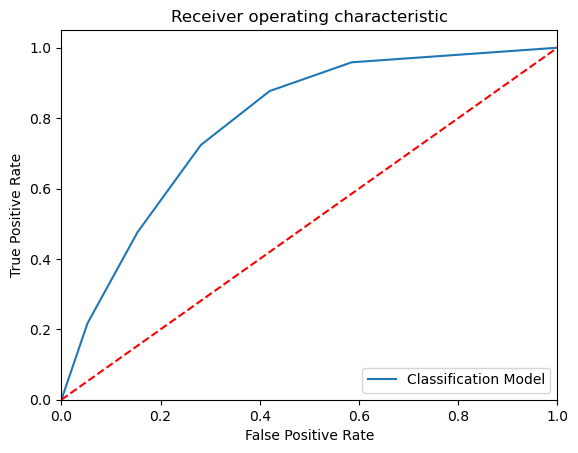

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[3909 2242]
 [2382 8175]]
Outcome values : 
 3909 2242 2382 8175
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.64      0.63      6151
           0       0.78      0.77      0.78     10557

    accuracy                           0.72     16708
   macro avg       0.70      0.70      0.70     16708
weighted avg       0.72      0.72      0.72     16708

Accuracy : 72.3 %
Precision : 62.1 %
Recall : 63.6 %
F1 Score : 0.628
Specificity or True Negative Rate : 77.4 %
Balanced Accuracy : 70.5 %
MCC : 0.408
roc_auc_score: 0.705


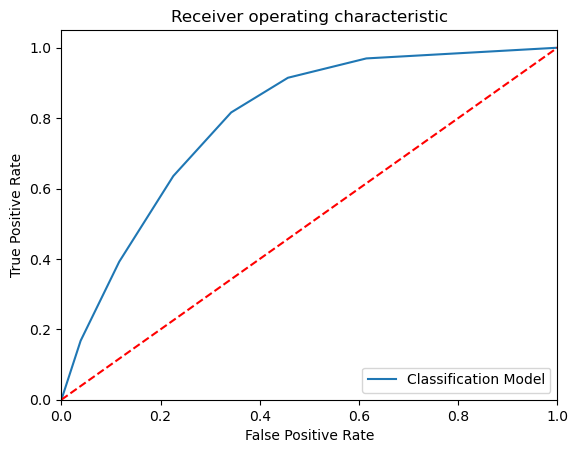

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[4563 1588]
 [3035 7522]]
Outcome values : 
 4563 1588 3035 7522
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.74      0.66      6151
           0       0.83      0.71      0.76     10557

    accuracy                           0.72     16708
   macro avg       0.71      0.73      0.71     16708
weighted avg       0.74      0.72      0.73     16708

Accuracy : 72.3 %
Precision : 60.1 %
Recall : 74.2 %
F1 Score : 0.664
Specificity or True Negative Rate : 71.3 %
Balanced Accuracy : 72.8 %
MCC : 0.44
roc_auc_score: 0.727


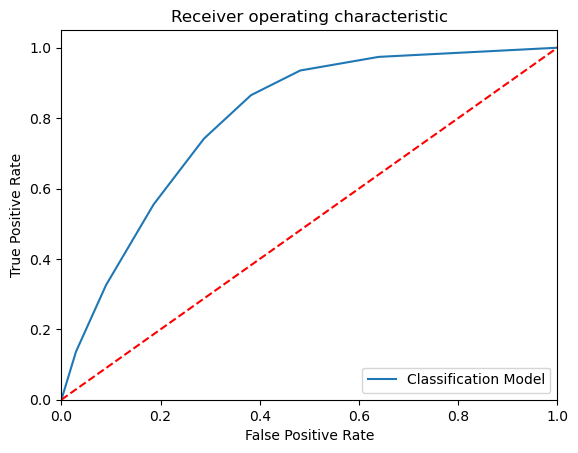

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[4173 1978]
 [2578 7979]]
Outcome values : 
 4173 1978 2578 7979
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.68      0.65      6151
           0       0.80      0.76      0.78     10557

    accuracy                           0.73     16708
   macro avg       0.71      0.72      0.71     16708
weighted avg       0.73      0.73      0.73     16708

Accuracy : 72.7 %
Precision : 61.8 %
Recall : 67.8 %
F1 Score : 0.647
Specificity or True Negative Rate : 75.6 %
Balanced Accuracy : 71.7 %
MCC : 0.427
roc_auc_score: 0.717


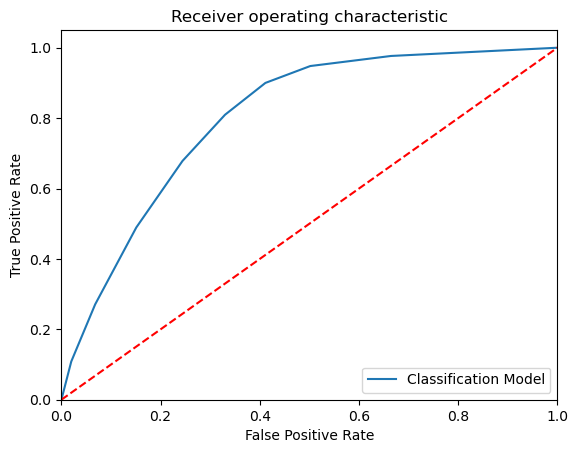

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[4678 1473]
 [3049 7508]]
Outcome values : 
 4678 1473 3049 7508
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.76      0.67      6151
           0       0.84      0.71      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 72.9 %
Precision : 60.5 %
Recall : 76.1 %
F1 Score : 0.674
Specificity or True Negative Rate : 71.1 %
Balanced Accuracy : 73.6 %
MCC : 0.456
roc_auc_score: 0.736


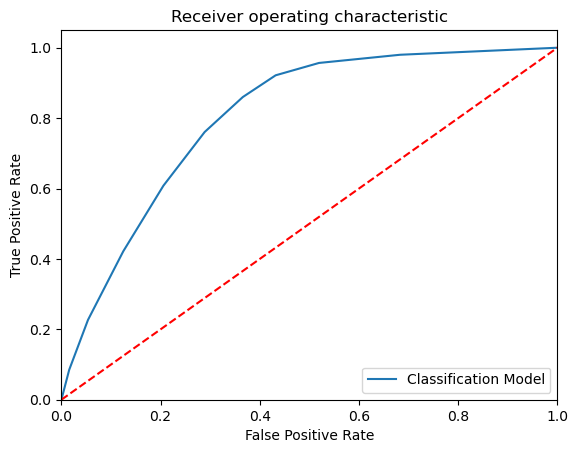

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[4294 1857]
 [2674 7883]]
Outcome values : 
 4294 1857 2674 7883
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.70      0.65      6151
           0       0.81      0.75      0.78     10557

    accuracy                           0.73     16708
   macro avg       0.71      0.72      0.72     16708
weighted avg       0.74      0.73      0.73     16708

Accuracy : 72.9 %
Precision : 61.6 %
Recall : 69.8 %
F1 Score : 0.655
Specificity or True Negative Rate : 74.7 %
Balanced Accuracy : 72.2 %
MCC : 0.435
roc_auc_score: 0.722


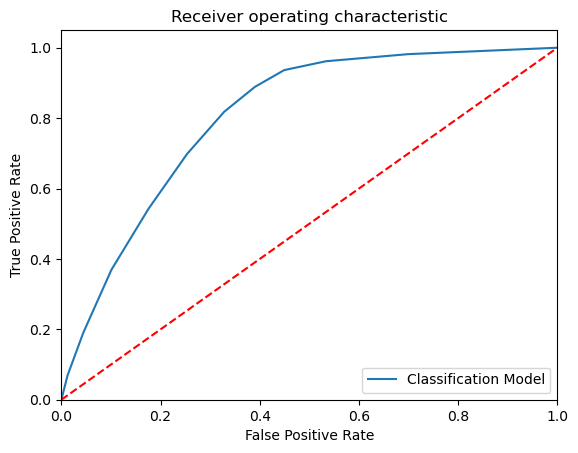

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[4723 1428]
 [3110 7447]]
Outcome values : 
 4723 1428 3110 7447
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.77      0.68      6151
           0       0.84      0.71      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 72.8 %
Precision : 60.3 %
Recall : 76.8 %
F1 Score : 0.675
Specificity or True Negative Rate : 70.5 %
Balanced Accuracy : 73.6 %
MCC : 0.457
roc_auc_score: 0.737


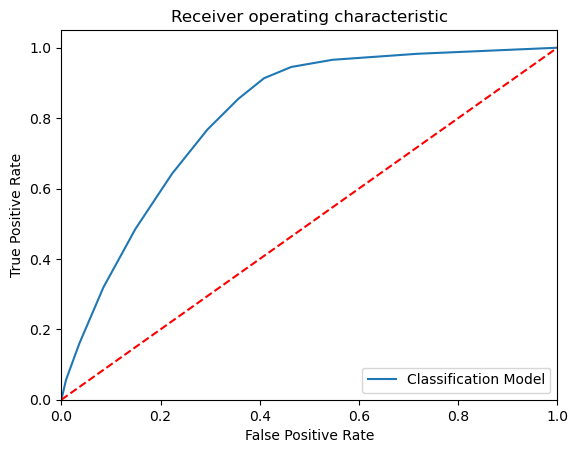

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[4424 1727]
 [2761 7796]]
Outcome values : 
 4424 1727 2761 7796
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.72      0.66      6151
           0       0.82      0.74      0.78     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.73      0.72     16708
weighted avg       0.74      0.73      0.73     16708

Accuracy : 73.1 %
Precision : 61.6 %
Recall : 71.9 %
F1 Score : 0.663
Specificity or True Negative Rate : 73.8 %
Balanced Accuracy : 72.8 %
MCC : 0.446
roc_auc_score: 0.729


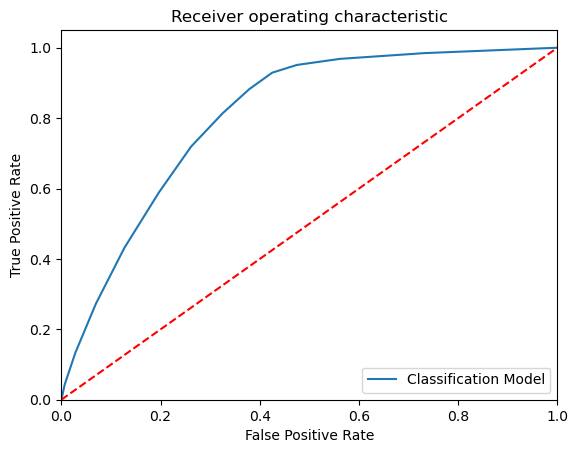

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[4750 1401]
 [3122 7435]]
Outcome values : 
 4750 1401 3122 7435
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.77      0.68      6151
           0       0.84      0.70      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 72.9 %
Precision : 60.3 %
Recall : 77.2 %
F1 Score : 0.677
Specificity or True Negative Rate : 70.4 %
Balanced Accuracy : 73.8 %
MCC : 0.46
roc_auc_score: 0.738


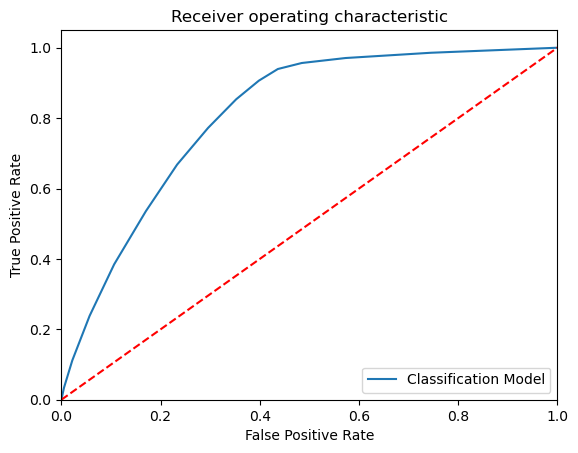

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[4492 1659]
 [2831 7726]]
Outcome values : 
 4492 1659 2831 7726
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.73      0.67      6151
           0       0.82      0.73      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.73      0.72     16708
weighted avg       0.75      0.73      0.74     16708

Accuracy : 73.1 %
Precision : 61.3 %
Recall : 73.0 %
F1 Score : 0.667
Specificity or True Negative Rate : 73.2 %
Balanced Accuracy : 73.1 %
MCC : 0.449
roc_auc_score: 0.731


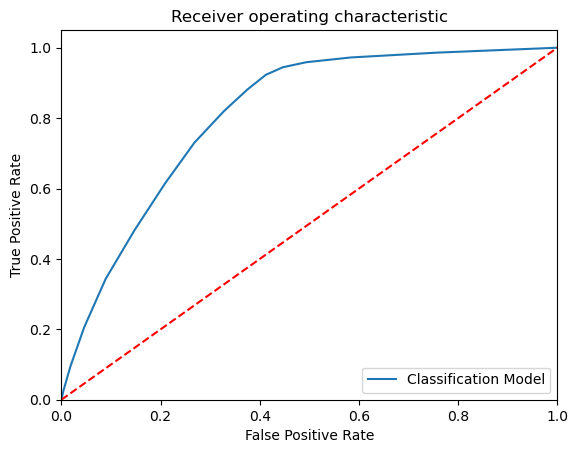

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[4815 1336]
 [3181 7376]]
Outcome values : 
 4815 1336 3181 7376
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.78      0.68      6151
           0       0.85      0.70      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.76      0.73      0.73     16708

Accuracy : 73.0 %
Precision : 60.2 %
Recall : 78.3 %
F1 Score : 0.681
Specificity or True Negative Rate : 69.9 %
Balanced Accuracy : 74.1 %
MCC : 0.465
roc_auc_score: 0.741


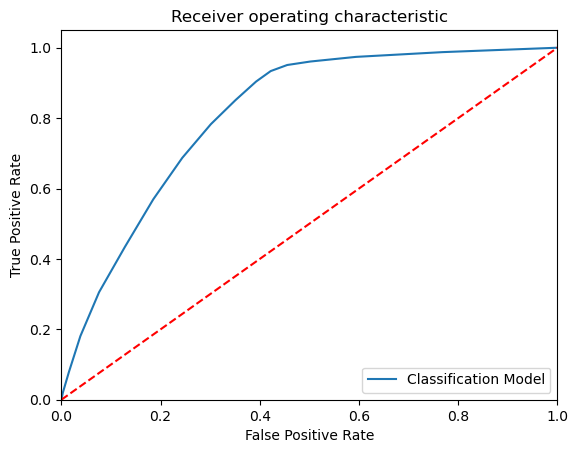

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[4559 1592]
 [2917 7640]]
Outcome values : 
 4559 1592 2917 7640
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.74      0.67      6151
           0       0.83      0.72      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.73      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 73.0 %
Precision : 61.0 %
Recall : 74.1 %
F1 Score : 0.669
Specificity or True Negative Rate : 72.4 %
Balanced Accuracy : 73.2 %
MCC : 0.451
roc_auc_score: 0.732


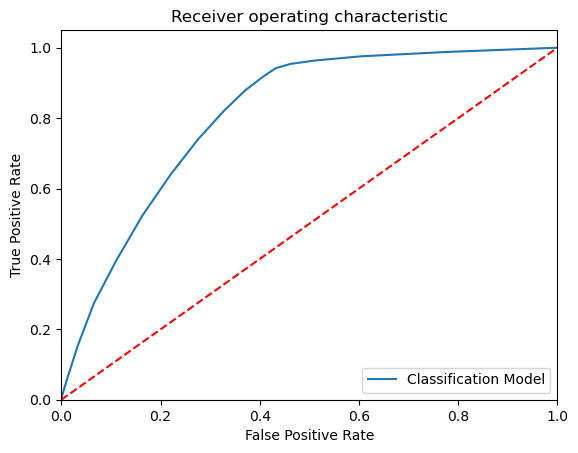

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[4821 1330]
 [3218 7339]]
Outcome values : 
 4821 1330 3218 7339
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.78      0.68      6151
           0       0.85      0.70      0.76     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.76      0.73      0.73     16708

Accuracy : 72.8 %
Precision : 60.0 %
Recall : 78.4 %
F1 Score : 0.679
Specificity or True Negative Rate : 69.5 %
Balanced Accuracy : 74.0 %
MCC : 0.462
roc_auc_score: 0.739


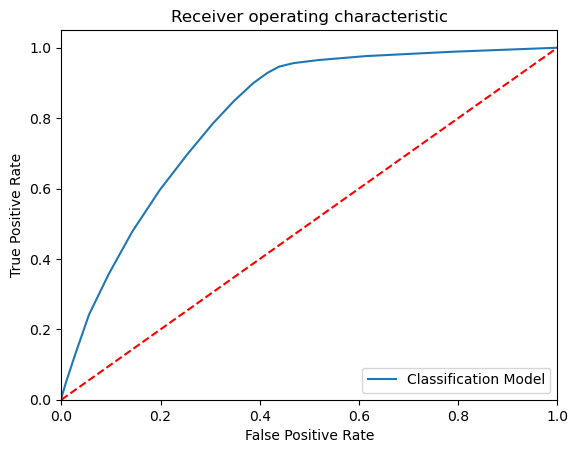

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[4596 1555]
 [2975 7582]]
Outcome values : 
 4596 1555 2975 7582
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.75      0.67      6151
           0       0.83      0.72      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.73      0.72     16708
weighted avg       0.75      0.73      0.73     16708

Accuracy : 72.9 %
Precision : 60.7 %
Recall : 74.7 %
F1 Score : 0.67
Specificity or True Negative Rate : 71.8 %
Balanced Accuracy : 73.2 %
MCC : 0.451
roc_auc_score: 0.733


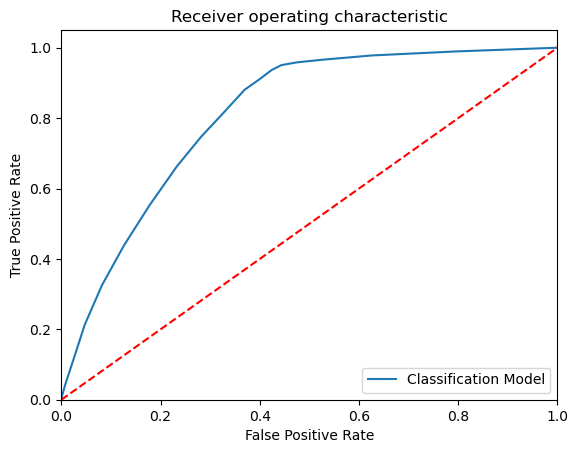

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[4825 1326]
 [3220 7337]]
Outcome values : 
 4825 1326 3220 7337
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.78      0.68      6151
           0       0.85      0.69      0.76     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.76      0.73      0.73     16708

Accuracy : 72.8 %
Precision : 60.0 %
Recall : 78.4 %
F1 Score : 0.68
Specificity or True Negative Rate : 69.5 %
Balanced Accuracy : 74.0 %
MCC : 0.463
roc_auc_score: 0.74


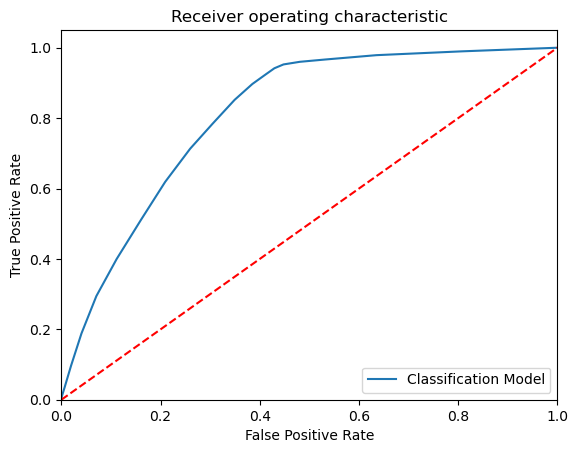

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[4649 1502]
 [2991 7566]]
Outcome values : 
 4649 1502 2991 7566
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.76      0.67      6151
           0       0.83      0.72      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.75      0.73      0.74     16708

Accuracy : 73.1 %
Precision : 60.9 %
Recall : 75.6 %
F1 Score : 0.674
Specificity or True Negative Rate : 71.7 %
Balanced Accuracy : 73.6 %
MCC : 0.457
roc_auc_score: 0.736


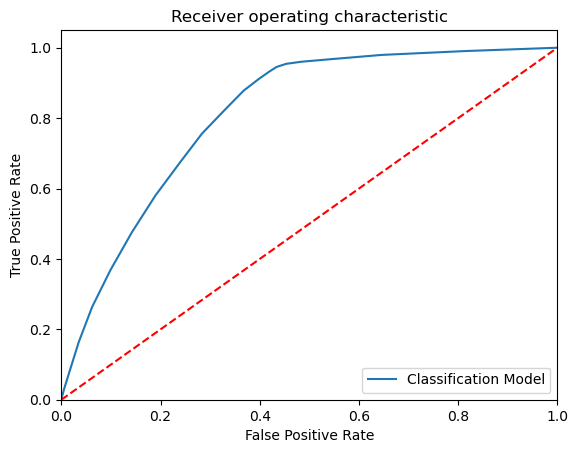

In [19]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results-----------------------------------------------------------------------

In [20]:
KNN_Results.head(20)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,3985,2166,2908,7649,0.696,0.578,0.648,0.611,0.725,0.365,0.686203,0.686
1,KNeighborsClassifier(n_neighbors=2),2,2978,3173,1744,8813,0.706,0.631,0.484,0.548,0.835,0.342,0.659475,0.660
2,KNeighborsClassifier(n_neighbors=3),3,4173,1978,2934,7623,0.706,0.587,0.678,0.630,0.722,0.391,0.700253,0.700
3,KNeighborsClassifier(n_neighbors=4),4,3497,2654,2107,8450,0.715,0.624,0.569,0.595,0.800,0.377,0.684471,0.684
4,KNeighborsClassifier(),5,4451,1700,2968,7589,0.721,0.600,0.724,0.656,0.719,0.430,0.721241,0.722
5,KNeighborsClassifier(n_neighbors=6),6,3909,2242,2382,8175,0.723,0.621,0.636,0.628,0.774,0.408,0.704937,0.705
6,KNeighborsClassifier(n_neighbors=7),7,4563,1588,3035,7522,0.723,0.601,0.742,0.664,0.713,0.440,0.727172,0.728
7,KNeighborsClassifier(n_neighbors=8),8,4173,1978,2578,7979,0.727,0.618,0.678,0.647,0.756,0.427,0.717114,0.717
8,KNeighborsClassifier(n_neighbors=9),9,4678,1473,3049,7508,0.729,0.605,0.761,0.674,0.711,0.456,0.735857,0.736
9,KNeighborsClassifier(n_neighbors=10),10,4294,1857,2674,7883,0.729,0.616,0.698,0.655,0.747,0.435,0.722403,0.722


In [21]:

EMResults1=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults (1).csv",header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM Algorithm

Model Name:  SVM - Linear
Confusion matrix : 
 [[5576  575]
 [4309 6248]]
Outcome values : 
 5576 575 4309 6248
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.91      0.70      6151
           0       0.92      0.59      0.72     10557

    accuracy                           0.71     16708
   macro avg       0.74      0.75      0.71     16708
weighted avg       0.79      0.71      0.71     16708

Accuracy : 70.8 %
Precision : 56.4 %
Recall : 90.7 %
F1 Score : 0.695
Specificity or True Negative Rate : 59.2 %
Balanced Accuracy : 75.0 %
MCC : 0.489
roc_auc_score: 0.749


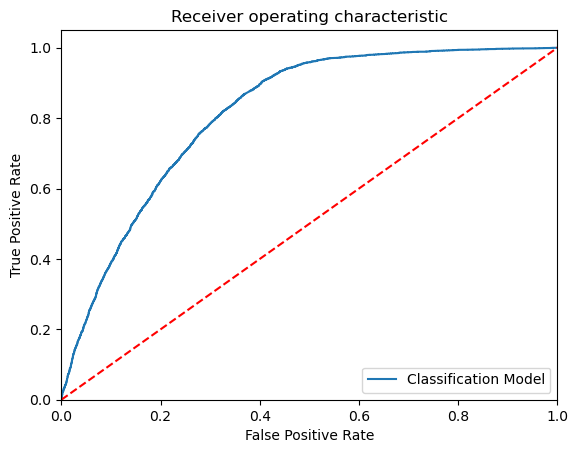

-----------------------------------------------------------------------------------------------------


In [22]:

# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

In [23]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,5576,575,4309,6248,0.708,0.564,0.907,0.695,0.592,0.489,0.749177,0.75


Model Name:  SVM - Polynominal
Confusion matrix : 
 [[5103 1048]
 [3353 7204]]
Outcome values : 
 5103 1048 3353 7204
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.83      0.70      6151
           0       0.87      0.68      0.77     10557

    accuracy                           0.74     16708
   macro avg       0.74      0.76      0.73     16708
weighted avg       0.77      0.74      0.74     16708

Accuracy : 73.7 %
Precision : 60.3 %
Recall : 83.0 %
F1 Score : 0.699
Specificity or True Negative Rate : 68.2 %
Balanced Accuracy : 75.6 %
MCC : 0.494
roc_auc_score: 0.756


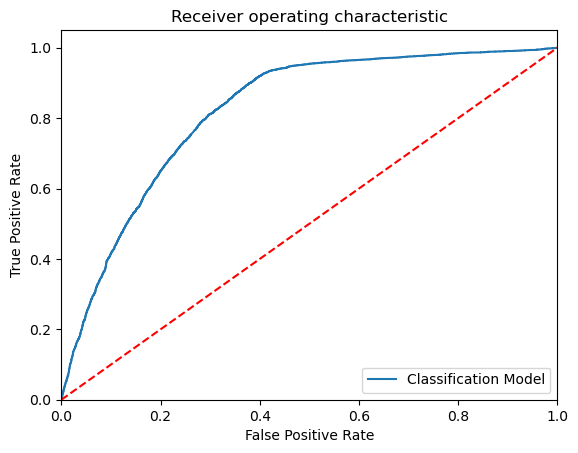

-----------------------------------------------------------------------------------------------------


In [24]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

In [25]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,5576,575,4309,6248,0.708,0.564,0.907,0.695,0.592,0.489,0.749177,0.750
1,SVM - Polynominal,5103,1048,3353,7204,0.737,0.603,0.830,0.699,0.682,0.494,0.756006,0.756


Model Name:  SVM - Gaussian
Confusion matrix : 
 [[5878  273]
 [4697 5860]]
Outcome values : 
 5878 273 4697 5860
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.96      0.70      6151
           0       0.96      0.56      0.70     10557

    accuracy                           0.70     16708
   macro avg       0.76      0.76      0.70     16708
weighted avg       0.81      0.70      0.70     16708

Accuracy : 70.3 %
Precision : 55.6 %
Recall : 95.6 %
F1 Score : 0.703
Specificity or True Negative Rate : 55.5 %
Balanced Accuracy : 75.6 %
MCC : 0.511
roc_auc_score: 0.755


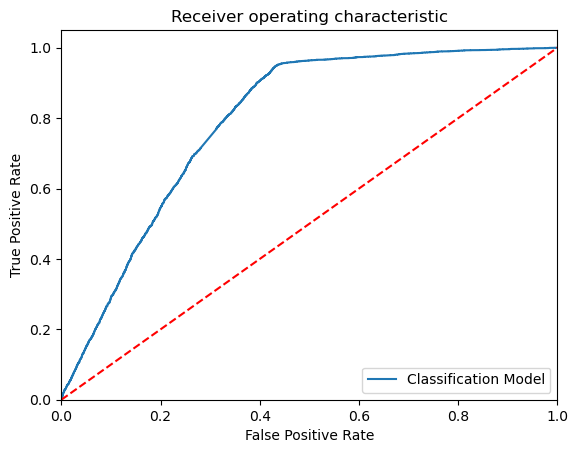

-----------------------------------------------------------------------------------------------------


In [26]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

In [27]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,5576,575,4309,6248,0.708,0.564,0.907,0.695,0.592,0.489,0.749177,0.750
1,SVM - Polynominal,5103,1048,3353,7204,0.737,0.603,0.830,0.699,0.682,0.494,0.756006,0.756
2,SVM - Gaussian,5878,273,4697,5860,0.703,0.556,0.956,0.703,0.555,0.511,0.755349,0.756


Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[2633 3518]
 [5155 5402]]
Outcome values : 
 2633 3518 5155 5402
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.43      0.38      6151
           0       0.61      0.51      0.55     10557

    accuracy                           0.48     16708
   macro avg       0.47      0.47      0.47     16708
weighted avg       0.51      0.48      0.49     16708

Accuracy : 48.1 %
Precision : 33.8 %
Recall : 42.8 %
F1 Score : 0.378
Specificity or True Negative Rate : 51.2 %
Balanced Accuracy : 47.0 %
MCC : -0.058
roc_auc_score: 0.47


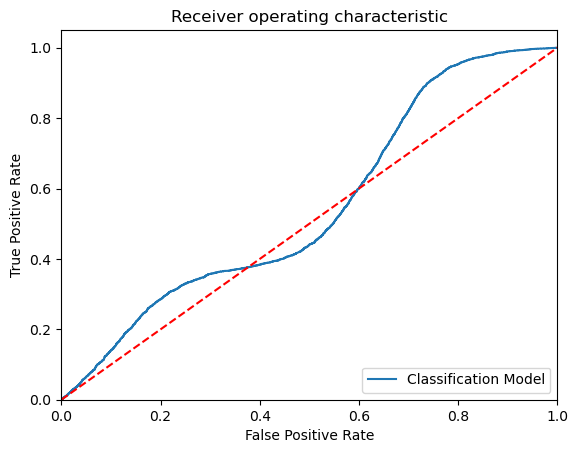

-----------------------------------------------------------------------------------------------------


In [28]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [29]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,5576,575,4309,6248,0.708,0.564,0.907,0.695,0.592,0.489,0.749177,0.750
1,SVM - Polynominal,5103,1048,3353,7204,0.737,0.603,0.830,0.699,0.682,0.494,0.756006,0.756
2,SVM - Gaussian,5878,273,4697,5860,0.703,0.556,0.956,0.703,0.555,0.511,0.755349,0.756
3,SVM - Sigmoid,2633,3518,5155,5402,0.481,0.338,0.428,0.378,0.512,-0.058,0.469879,0.470


# comparision classification

In [32]:
EMResults=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults (1).csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[5770  381]
 [4482 6075]]
Outcome values : 
 5770 381 4482 6075
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.94      0.70      6151
           0       0.94      0.58      0.71     10557

    accuracy                           0.71     16708
   macro avg       0.75      0.76      0.71     16708
weighted avg       0.80      0.71      0.71     16708

Accuracy : 70.9 %
Precision : 56.3 %
Recall : 93.8 %
F1 Score : 0.704
Specificity or True Negative Rate : 57.5 %
Balanced Accuracy : 75.6 %
MCC : 0.509
roc_auc_score: 0.757


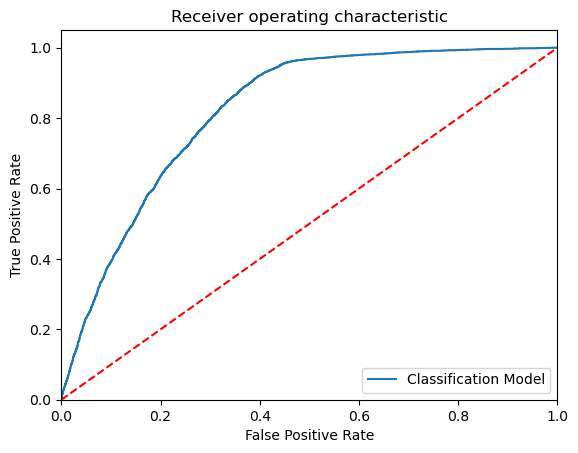

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[3343 2808]
 [3696 6861]]
Outcome values : 
 3343 2808 3696 6861
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.54      0.51      6151
           0       0.71      0.65      0.68     10557

    accuracy                           0.61     16708
   macro avg       0.59      0.60      0.59     16708
weighted avg       0.62      0.61      0.62     16708

Accuracy : 61.1 %
Precision : 47.5 %
Recall : 54.3 %
F1 Score : 0.507
Specificity or True Negative Rate : 65.0 %
Balanced Accuracy : 59.6 %
MCC : 0.189
roc_auc_score: 0.597


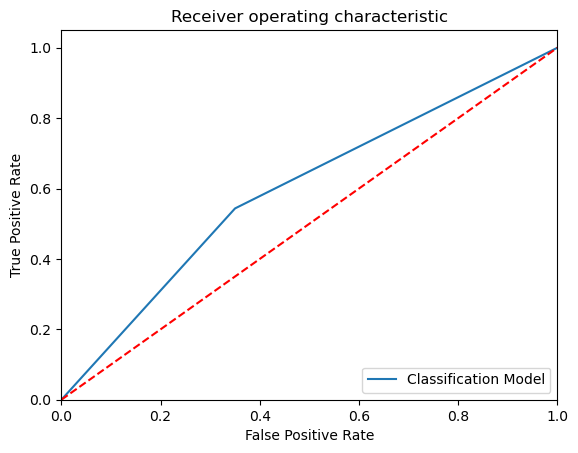

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[3874 2277]
 [1999 8558]]
Outcome values : 
 3874 2277 1999 8558
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.63      0.64      6151
           0       0.79      0.81      0.80     10557

    accuracy                           0.74     16708
   macro avg       0.72      0.72      0.72     16708
weighted avg       0.74      0.74      0.74     16708

Accuracy : 74.4 %
Precision : 66.0 %
Recall : 63.0 %
F1 Score : 0.644
Specificity or True Negative Rate : 81.1 %
Balanced Accuracy : 72.0 %
MCC : 0.445
roc_auc_score: 0.72


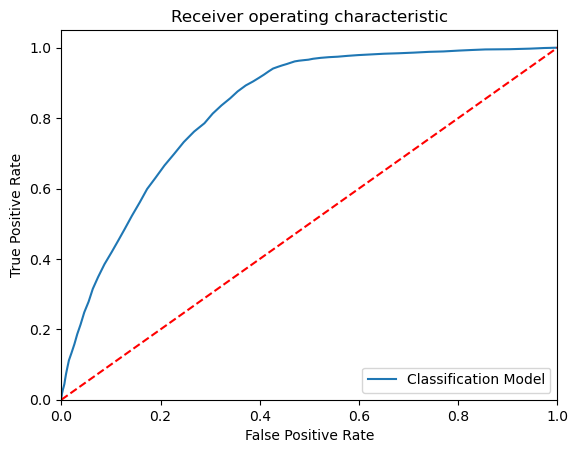

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[4674 1477]
 [2756 7801]]
Outcome values : 
 4674 1477 2756 7801
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.76      0.69      6151
           0       0.84      0.74      0.79     10557

    accuracy                           0.75     16708
   macro avg       0.73      0.75      0.74     16708
weighted avg       0.76      0.75      0.75     16708

Accuracy : 74.7 %
Precision : 62.9 %
Recall : 76.0 %
F1 Score : 0.688
Specificity or True Negative Rate : 73.9 %
Balanced Accuracy : 75.0 %
MCC : 0.484
roc_auc_score: 0.749


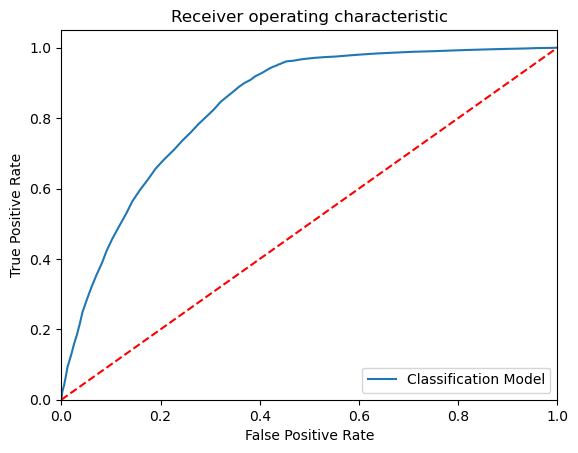

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[4649 1502]
 [2991 7566]]
Outcome values : 
 4649 1502 2991 7566
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.76      0.67      6151
           0       0.83      0.72      0.77     10557

    accuracy                           0.73     16708
   macro avg       0.72      0.74      0.72     16708
weighted avg       0.75      0.73      0.74     16708

Accuracy : 73.1 %
Precision : 60.9 %
Recall : 75.6 %
F1 Score : 0.674
Specificity or True Negative Rate : 71.7 %
Balanced Accuracy : 73.6 %
MCC : 0.457
roc_auc_score: 0.736


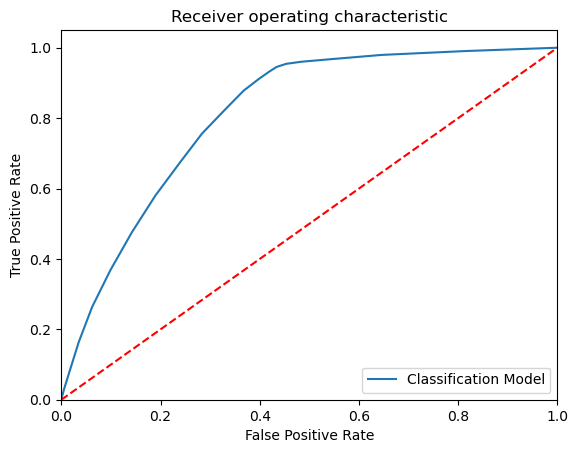

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[5103 1048]
 [3353 7204]]
Outcome values : 
 5103 1048 3353 7204
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.83      0.70      6151
           0       0.87      0.68      0.77     10557

    accuracy                           0.74     16708
   macro avg       0.74      0.76      0.73     16708
weighted avg       0.77      0.74      0.74     16708

Accuracy : 73.7 %
Precision : 60.3 %
Recall : 83.0 %
F1 Score : 0.699
Specificity or True Negative Rate : 68.2 %
Balanced Accuracy : 75.6 %
MCC : 0.494
roc_auc_score: 0.756


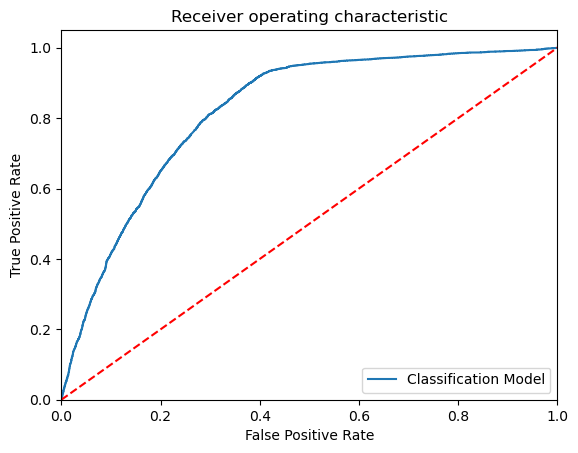

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[1825 4326]
 [ 959 9598]]
Outcome values : 
 1825 4326 959 9598
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.30      0.41      6151
           0       0.69      0.91      0.78     10557

    accuracy                           0.68     16708
   macro avg       0.67      0.60      0.60     16708
weighted avg       0.68      0.68      0.65     16708

Accuracy : 68.4 %
Precision : 65.6 %
Recall : 29.7 %
F1 Score : 0.409
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 60.3 %
MCC : 0.266
roc_auc_score: 0.603


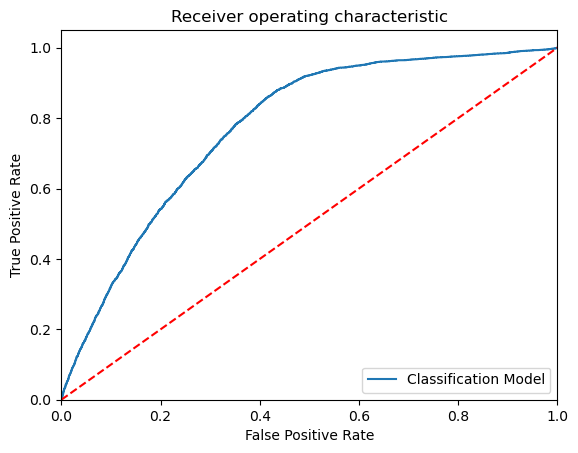

-----------------------------------------------------------------------------------------------------


In [38]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=20)
ModelSVM = SVC(kernel='poly', degree=2, probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------

In [39]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),5770,381,4482,6075,0.709,0.563,0.938,0.704,0.575,0.509,0.756753,0.756
1,DecisionTreeClassifier(),3340,2811,3572,6985,0.618,0.483,0.543,0.511,0.662,0.200,0.602324,0.602
2,"(DecisionTreeClassifier(max_features='auto', r...",3966,2185,2063,8494,0.746,0.658,0.645,0.651,0.805,0.451,0.724679,0.725
3,"(ExtraTreeClassifier(random_state=1343028982),...",4752,1399,2877,7680,0.744,0.623,0.773,0.690,0.727,0.484,0.750018,0.750
4,KNeighborsClassifier(n_neighbors=20),4649,1502,2991,7566,0.731,0.609,0.756,0.674,0.717,0.457,0.736246,0.736
5,"SVC(degree=2, kernel='poly', probability=True)",5103,1048,3353,7204,0.737,0.603,0.830,0.699,0.682,0.494,0.756006,0.756
6,LogisticRegression(),5770,381,4482,6075,0.709,0.563,0.938,0.704,0.575,0.509,0.756753,0.756
7,DecisionTreeClassifier(),3343,2808,3696,6861,0.611,0.475,0.543,0.507,0.650,0.189,0.596695,0.596
8,"(DecisionTreeClassifier(max_features='auto', r...",3874,2277,1999,8558,0.744,0.660,0.630,0.644,0.811,0.445,0.720232,0.720
9,"(ExtraTreeClassifier(random_state=61305527), E...",4674,1477,2756,7801,0.747,0.629,0.760,0.688,0.739,0.484,0.749409,0.750


# Predict the values with ET Algorithm(High Accuracy)

In [42]:
y_predET=ModelET.predict(x_test)

# Display the Final result

In [48]:
#display the final results

Results = pd.DataFrame({'diagnosis_A':y_test, 'diagnosis_P':y_predET})

#merge two datframes on index of both the datafrmes

ResultsFinal=SmokingData.merge(Results,left_index=True, right_index=True)

#display the 10 records randomly
ResultsFinal.sample(10)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,diagnosis_A,diagnosis_P
39924,1,30,165,60,77.0,0.1,0.3,1.0,1.0,136.0,63.0,102.0,273.0,142.0,45.0,200.0,14.8,1.0,1.1,33.0,49.0,82.0,0,1,1,1,1,1
25016,0,60,150,50,83.6,1.0,0.9,2.0,2.0,130.0,82.0,93.0,286.0,87.0,70.0,198.0,14.6,1.0,0.7,24.0,19.0,18.0,0,0,0,0,0,0
25182,0,55,155,45,68.0,0.4,0.4,1.0,1.0,145.0,97.0,109.0,267.0,77.0,81.0,171.0,13.3,1.0,0.7,24.0,13.0,20.0,0,1,1,0,0,0
19980,0,45,150,55,84.0,0.9,1.0,1.0,1.0,92.0,63.0,73.0,230.0,162.0,63.0,134.0,13.6,1.0,0.6,49.0,22.0,39.0,0,1,1,0,0,0
23825,0,60,155,60,78.0,0.9,0.9,1.0,1.0,144.0,88.0,110.0,239.0,95.0,102.0,118.0,14.2,1.0,0.6,25.0,17.0,16.0,0,0,1,0,0,0
31691,1,45,170,65,92.0,0.8,0.8,1.0,1.0,127.0,68.0,116.0,121.0,75.0,47.0,59.0,15.8,1.0,0.9,18.0,16.0,24.0,0,1,1,1,1,1
48358,1,40,170,85,89.0,1.2,1.2,1.0,1.0,124.0,83.0,114.0,201.0,213.0,35.0,139.0,15.9,1.0,1.2,29.0,43.0,33.0,0,0,0,0,0,0
1061,1,45,175,60,77.0,1.0,0.5,1.0,1.0,114.0,76.0,104.0,174.0,216.0,39.0,91.0,15.2,1.0,0.9,29.0,17.0,61.0,0,1,1,1,1,1
40316,1,45,175,85,90.0,1.2,1.5,1.0,1.0,129.0,82.0,103.0,256.0,239.0,41.0,167.0,14.4,1.0,0.8,40.0,62.0,83.0,0,0,0,0,0,1
33083,1,25,175,60,73.5,1.0,1.0,1.0,1.0,110.0,70.0,120.0,143.0,75.0,60.0,68.0,16.7,1.0,0.9,13.0,15.0,12.0,0,1,1,1,1,1
